Os dados estão disponíveis tanto no Kaggle como no repositório de Machine Learning UCI. Esses dados foram retirados do Guia de Campo Audubon Society para cogumelos Norteamericanos (1981), de G. H. Lincoff.

https://www.kaggle.com/uciml/mushroom-classification

Este conjunto de dados inclui descrições de 23 espécies de cogumelos branquiados da Família Agaricus e Lepiota, cada espécie é identificada como comestível, venenosa ou de comestibilidade desconhecida e não recomendada. 

Os cogumelos possuem características nutricionais importantes, como alto teor de proteínas e fibras alimentares, baixo teor de lipídeos, é uma fonte considerável de sais minerais, Vitamina C, Vitamina E e polifenóis, e também apresentam alta atividade antioxidante (Orcine et. al. 2012). 
Apresentam quantidades significativas de potássio, cálcio, fósforo,
magnésio, ferro, zinco, sódio, niacina, tiamina, riboflavina, biotina, ácido
ascórbico e pró-vitaminas A e D (Fortes et al., 2006).

Portanto, os cogumelos são uma ótima alternativa alimentar. Porem, a coleta de cogumelos silvestres pode ser uma difícil tarefa, pois muitas espécies de cogumelos são venenosas e podem levar seus consumidores a óbito.

Essa análise de dados foi feita com o intuito de gerar um Guia online de coleta de cogumelos que posteriormente pode ser acrescido de  uma interface digital de fácil manipulação ao usuário. Esse guia pode ser útil nas mais diversas situações, como na situação de estar perdido no meio natural em outro continente.

O que vocês esperam responder?
Classificar os cogumelos em venenosos ou não com base em suas características morfológicas.


**Análise dos dados**
---



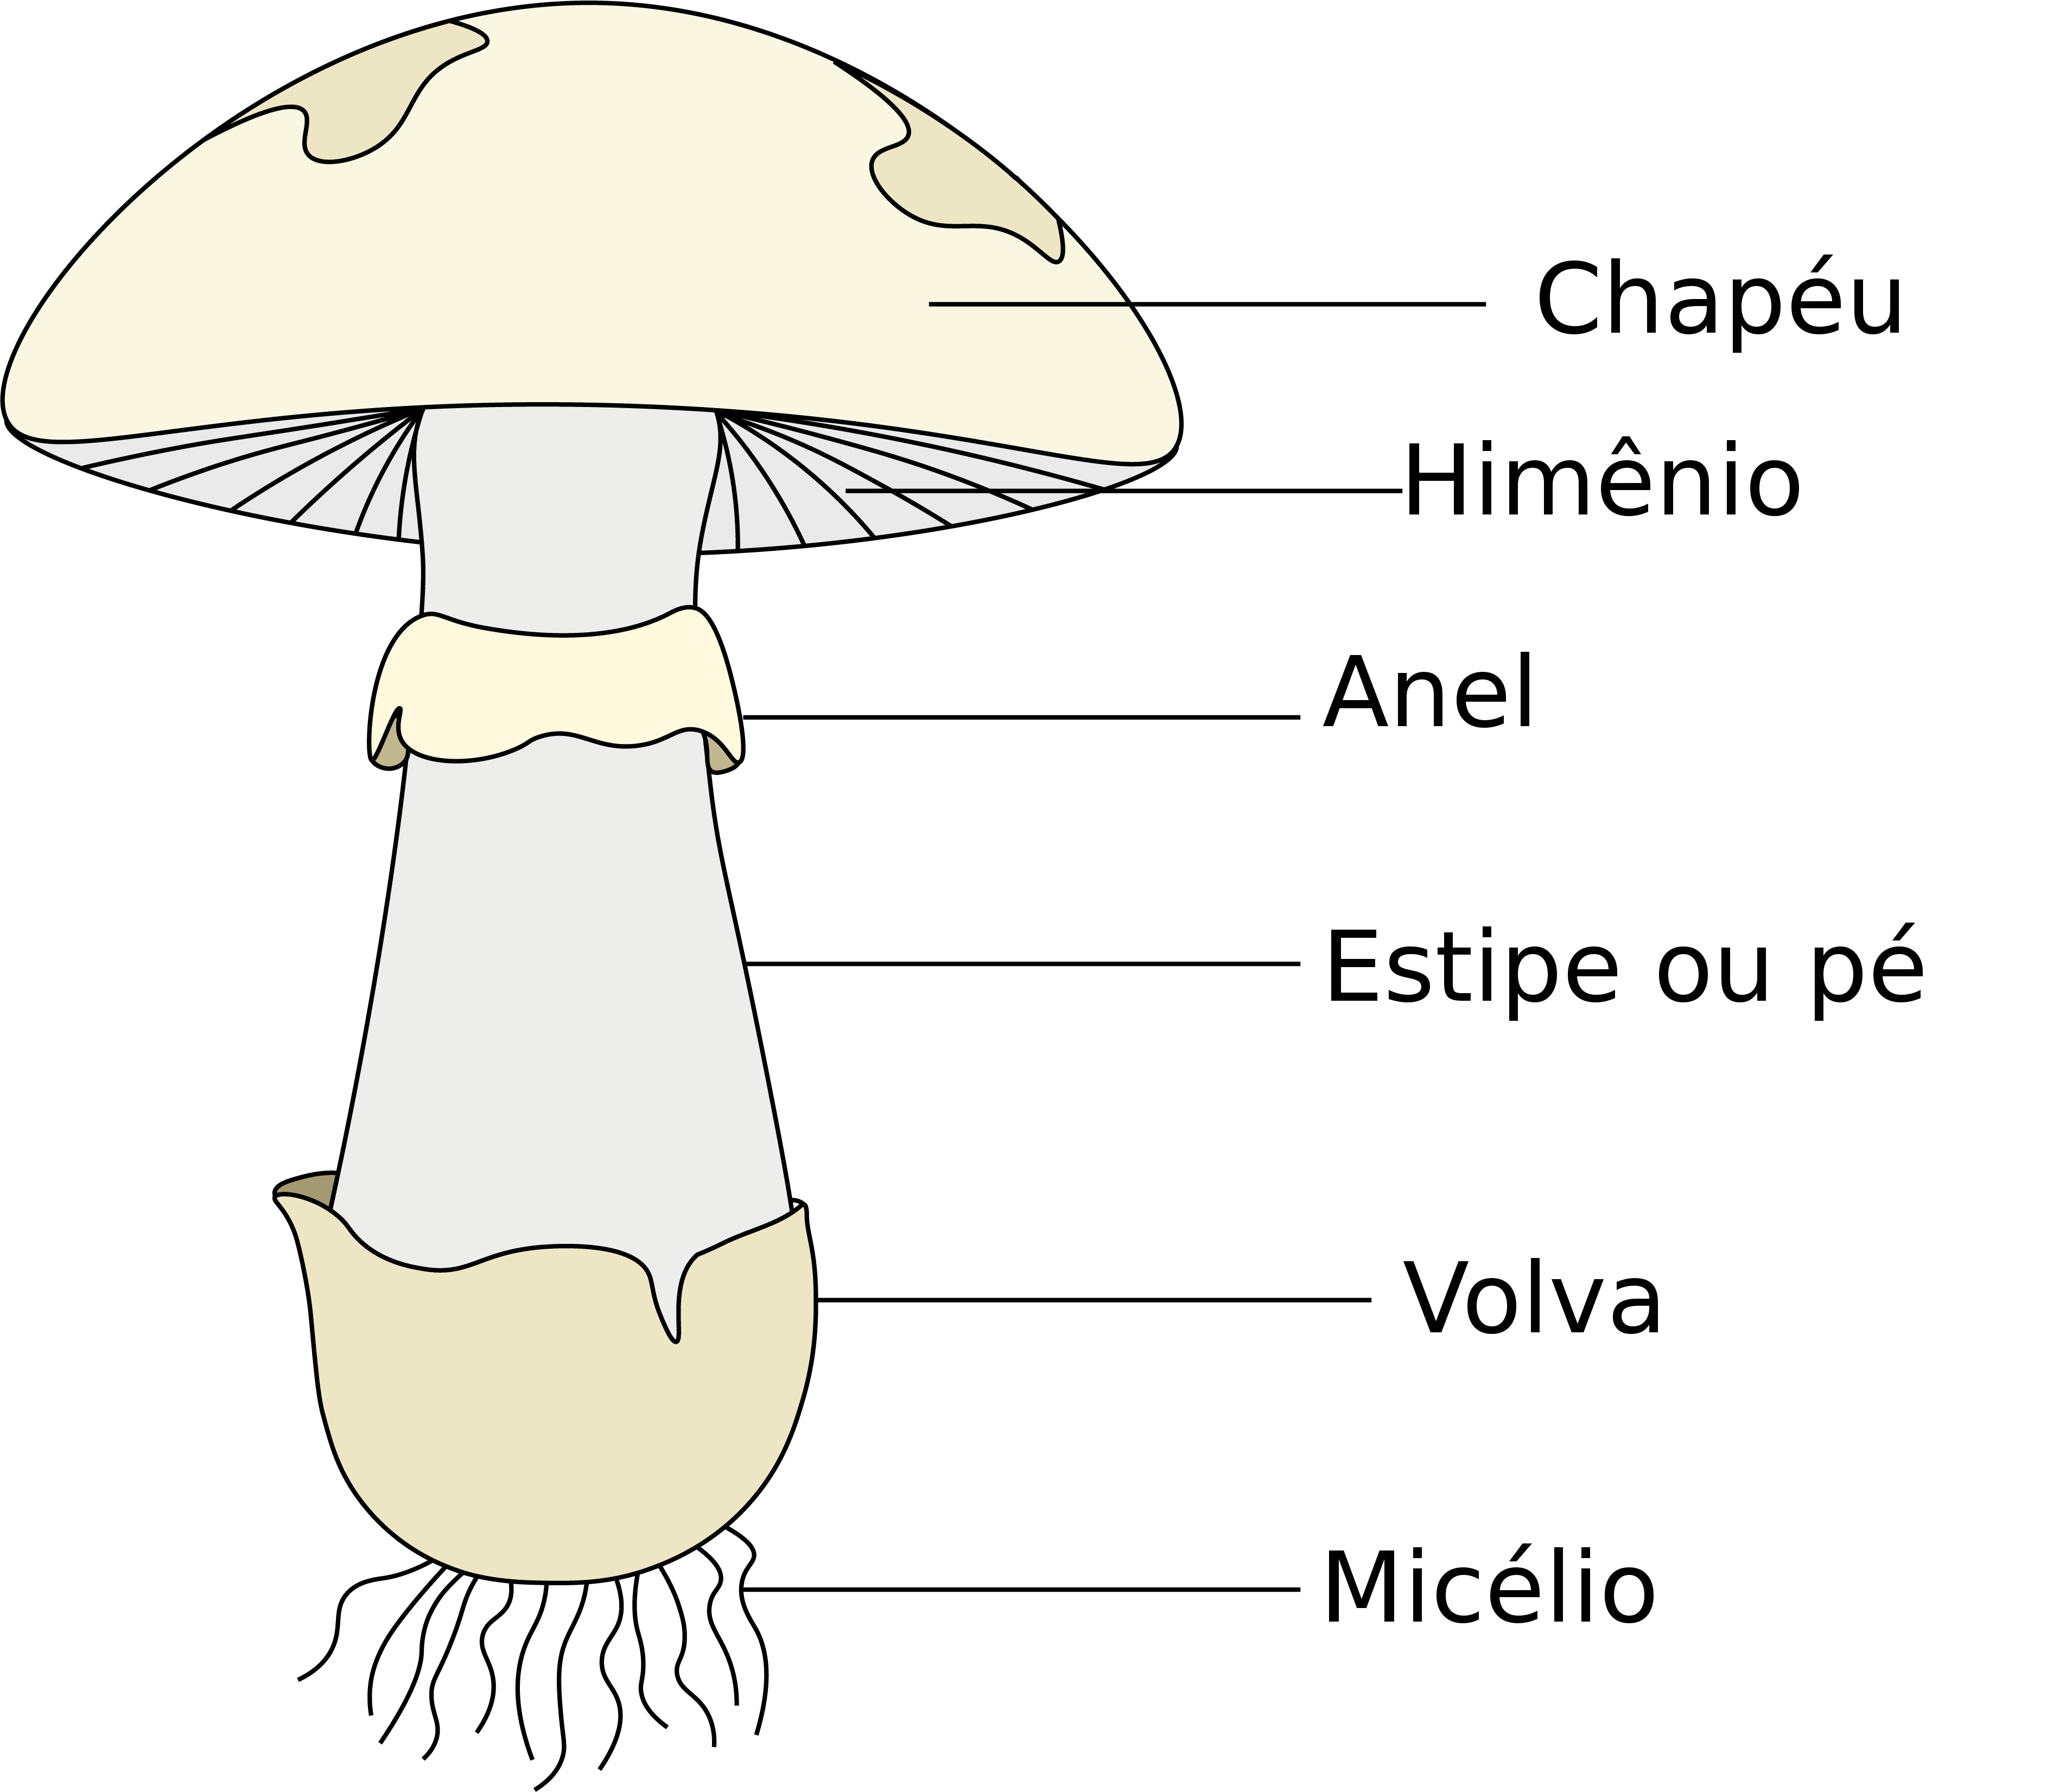

**Descrição das variáveis**: (classes: comestível=e, venenoso=p)

cap-shape: formato do chapéu do cogumelo, podendo ser: sino=b, cônico=c,convexo=x, plano=f, nodoso=k, afundado=s.

cap-surface: superfície do chapéu, fibroso=f, com sulcos=g, escamoso=y ou liso=s.

cap-color: cor do chapéu, marrom=n, buff=b, canela=c, cinza=g, verde=r, rosa=p,roxo=u, vermelho=e, branco=w ou amarelo=y.

bruises: presença de contusões=t ou ausência de contusões=f.

odor: amêndoa=a, anis=l, creosoto=c, duvidoso=y, mal cheiro=f, mofado=m,nenhum=n, odor forte=p, picante=s.

gill-attachment: As guelras (ou himênios) são as dobras presentes na parte inferior do capuz do cogumelo, elas podem ser anexadas=a, descendentes=d, livres=f ou entalhadas=n.

gill-spacing: espaçamento das guelras, perto = c, aglomerado = w, distante = d.

gill-size: tamanho da brânquia, largo=b, estreito=n.

gill-color: cor da brânquia, preto=k, marrom=n, amarelo=b, chocolate=h, cinza=g, verde=r, laranja=o, rosa=p, roxo=u, vermelho=e, branco=w, amarelo=y.

stalk-shape: forma da haste, ampliando=e ou afilando=t.

stalk-root: raiz do talo, bulboso=b, club=c, xícara=u, igual=e, rizomorfos=z, enraizado=r, perdido=?

stalk-surface-above-ring: superfície do talo acima do anel, fibroso=f, escamoso=y, sedoso=k ou liso=s.

stalk-surface-below-ring: superfície do talo abaixo do anel, fibroso=f, escamoso=y, sedoso=k ou liso=s.

stalk-color-above-ring: cor da haste acima do anel, marrom=n, amarelo=b,canela=c, cinza=g, laranja=o, rosa=p, vermelho=e, branco=w ou amarelo=y.

stalk-color-below-ring: cor da haste abaixo do anel, marrom=n, amarelo=b,canela=c, cinza=g, laranja=o, rosa=p, vermelho=e, branco=w ou amarelo=y.

veil-type: tipo de véu, parcial=p ou universal=u.

veil-color: cor do véu, marrom=n, laranja=o, branco=w ou amarelo=y.

ring-number: número do anel, nenhum=n, um=o ou dois=t.

tring-type: tipo de anel, teia de aranha=c, evanescenta=e, flamejante=f, grande=l, nenhum=n, pendente=p, revestido=s ou zone=z.

spore-print-color: cor de impressão de esporos, preto=k, marrom=n, amarelo=b, chocolate=h, verde=r, laranja=o, roxo=u, branco=w ou amarelo=y.

population: população, abundante=a, agrupado=c, numerousa=n, dispersa=s, vário=v ou solitário=y.

habitat: gramíneas=g, folhas=l, pradaria=m, caminhos=p, urbano=u, resíduos=w ou florestas=d.

**Preparo dos dados**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Como os daods são compostos por letras, esses dados precisam ser transformados em números para que possamos criar o modelo. Isso foi feito usando a função pandas.replace() para substituir cada letra referente as características morfológicas dos cogumelos por números. 

In [ ]:
classe = df['class'].replace('p',0).replace('e',1)
df1 = df['cap-shape'].replace('b',0).replace('c',1).replace('x',2).replace('f',3).replace('k',4).replace('s',5)
df2 = df['cap-surface'].replace('f',0).replace('g',1).replace('y',2).replace('s',3)
df3 = df['cap-color'].replace('n',0).replace('b',1).replace('c',2).replace('g',3).replace('r',4).replace('p',5).replace('u',6).replace('e',7).replace('w',8).replace('y',9)
df4 = df['bruises'].replace('t',0).replace('f',1)
df5 = df['odor'].replace('a',0).replace('l',1).replace('c',2).replace('y',3).replace('f',4).replace('m',5).replace('n',6).replace('p',7).replace('s',8)
df6 = df['gill-attachment'].replace('a',0).replace('d',1).replace('f',2).replace('n',3)
df7 = df['gill-spacing'].replace('c',0).replace('w',1).replace('d',2)
df8 = df['gill-size'].replace('b',0).replace('n',1)
df9 = df['gill-color'].replace('k',0).replace('n',1).replace('b',2).replace('h',3).replace('g',4).replace('r',5).replace('o',6).replace('p',7).replace('u',8).replace('e',9).replace('w',10).replace('y',11)
df10 = df['stalk-shape'].replace('e',0).replace('t',1)
df11 = df['stalk-root'].replace('b',0).replace('c',1).replace('u',2).replace('e',3).replace('z',4).replace('r',5).replace('?',6)
df12 = df['stalk-surface-above-ring'].replace('f',0).replace('y',1).replace('k',2).replace('s',3)
df13 = df['stalk-surface-below-ring'].replace('f',0).replace('y',1).replace('k',2).replace('s',3)
df14 = df['stalk-color-above-ring'].replace('n',0).replace('b',1).replace('c',2).replace('g',3).replace('o',4).replace('p',5).replace('e',6).replace('w',7).replace('y',8)
df15 = df['stalk-color-below-ring'].replace('n',0).replace('b',1).replace('c',2).replace('g',3).replace('o',4).replace('p',5).replace('e',6).replace('w',7).replace('y',8)
df16 = df['veil-type'].replace('p',0).replace('u',1)
df17 = df['veil-color'].replace('n',0).replace('o',1).replace('w',2).replace('y',3)
df18 = df['ring-number'].replace('n',0).replace('o',1).replace('t',2)
df19 = df['ring-type'].replace('c',0).replace('e',1).replace('f',2).replace('l',3).replace('n',4).replace('p',5).replace('s',6).replace('z',7)
df20 = df['spore-print-color'].replace('k',0).replace('n',1).replace('b',2).replace('h',3).replace('r',4).replace('o',5).replace('u',6).replace('w',7).replace('y',8)
df21 = df['population'].replace('a',0).replace('c',1).replace('n',2).replace('s',3).replace('v',4).replace('y',5)
df22 = df['habitat'].replace('g',0).replace('l',1).replace('m',2).replace('p',3).replace('u',4).replace('w',5).replace('d',6)

In [ ]:
DF = df
DF['class']=classe
DF['cap-shape']=df1
DF['cap-surface']=df2
DF['cap-color']=df3
DF['bruises']=df4
DF['odor']=df5
DF['gill-attachment']=df6
DF['gill-spacing']=df7
DF['gill-size']=df8
DF['gill-color']=df9
DF['stalk-shape']=df10
DF['stalk-root']=df11
DF['stalk-surface-above-ring']=df12
DF['stalk-surface-below-ring']=df13
DF['stalk-color-above-ring']=df14
DF['stalk-color-below-ring']=df15
DF['veil-type']=df16
DF['veil-color']=df17
DF['ring-number']=df18
DF['ring-type']=df19
DF['spore-print-color']=df20
DF['population']=df21
DF['habitat']=df22
DF

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,0,0,7,2,0,1,0,...,3,7,7,0,2,1,5,0,3,4
1,1,2,3,9,0,0,2,0,0,0,...,3,7,7,0,2,1,5,1,2,0
2,1,0,3,8,0,1,2,0,0,1,...,3,7,7,0,2,1,5,1,2,2
3,0,2,2,8,0,7,2,0,1,1,...,3,7,7,0,2,1,5,0,3,4
4,1,2,3,3,1,6,2,1,0,0,...,3,7,7,0,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,3,0,1,6,0,0,0,11,...,3,4,4,0,1,1,5,2,1,1
8120,1,2,3,0,1,6,0,0,0,11,...,3,4,4,0,0,1,5,2,4,1
8121,1,3,3,0,1,6,0,0,0,1,...,3,4,4,0,1,1,5,2,1,1
8122,0,4,2,0,1,3,2,0,1,2,...,2,7,7,0,2,1,1,7,4,1


Assim obtivemos o dataframe transformado

**Seleção das Features**

Agora, usando a função pandas.crosstab() fizemos a tabulação cruzada entre a classe de interesse com as features para ver quais features são mais significativas. Essa interpretação coube ao observador pois os dados são qualitativos.

In [ ]:
print(DF.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [ ]:
pd.crosstab(DF['class'],DF['cap-shape'],normalize='index')

cap-shape,0,1,2,3,4,5
class,,,,,,
0,0.012257,0.001021,0.436159,0.397344,0.153218,0.000000
1,0.096008,0.000000,0.462928,0.379278,0.054183,0.007605


In [ ]:
pd.crosstab(DF['class'],DF['cap-surface'],normalize='index')

cap-surface,0,1,2,3
class,,,,
0,0.194076,0.001021,0.444331,0.360572
1,0.370722,0.000000,0.357414,0.271863


In [ ]:
pd.crosstab(DF['class'],DF['cap-color'],normalize='index')

cap-color,0,1,2,3,4,5,6,7,8,9
class,,,,,,,,,,
0,0.26047,0.030644,0.003064,0.206333,0.000000,0.022472,0.000000,0.223698,0.081716,0.171604
1,0.30038,0.011407,0.007605,0.245247,0.003802,0.013308,0.003802,0.148289,0.171103,0.095057


In [ ]:
pd.crosstab(DF['class'],DF['bruises'],normalize='index')

bruises,0,1
class,,
0,0.159346,0.840654
1,0.653992,0.346008


In [ ]:
pd.crosstab(DF['class'],DF['odor'],normalize='index')

odor,0,1,2,3,4,5,6,7,8
class,,,,,,,,,
0,0.000000,0.000000,0.04903,0.147089,0.551583,0.009193,0.030644,0.065373,0.147089
1,0.095057,0.095057,0.00000,0.000000,0.000000,0.000000,0.809886,0.000000,0.000000


In [ ]:
pd.crosstab(DF['class'],DF['gill-attachment'],normalize='index')

gill-attachment,0,2
class,,
0,0.004597,0.995403
1,0.045627,0.954373


In [ ]:
pd.crosstab(DF['class'],DF['gill-spacing'],normalize='index')

gill-spacing,0,1
class,,
0,0.971399,0.028601
1,0.714829,0.285171


In [ ]:
pd.crosstab(DF['class'],DF['gill-size'],normalize='index')

gill-size,0,1
class,,
0,0.432074,0.567926
1,0.931559,0.068441


In [ ]:
pd.crosstab(DF['class'],DF['gill-color'],normalize='index')

gill-color,0,1,2,3,4,5,6,7,8,9,10,11
class,,,,,,,,,,,,
0,0.016343,0.028601,0.441267,0.134831,0.128703,0.006129,0.000000,0.163432,0.012257,0.000000,0.062819,0.005618
1,0.081749,0.222433,0.000000,0.048479,0.058935,0.000000,0.015209,0.202471,0.105513,0.022814,0.227186,0.015209


In [ ]:
pd.crosstab(DF['class'],DF['stalk-shape'],normalize='index')

stalk-shape,0,1
class,,
0,0.485189,0.514811
1,0.384030,0.615970


In [ ]:
pd.crosstab(DF['class'],DF['stalk-root'],normalize='index')

stalk-root,0,1,3,5,6
class,,,,,
0,0.473953,0.011236,0.065373,0.000000,0.449438
1,0.456274,0.121673,0.205323,0.045627,0.171103


In [ ]:
pd.crosstab(DF['class'],DF['stalk-surface-above-ring'],normalize='index')

stalk-surface-above-ring,0,1,2,3
class,,,,
0,0.036772,0.002043,0.568948,0.392237
1,0.096958,0.003802,0.034221,0.865019


In [ ]:
pd.crosstab(DF['class'],DF['stalk-surface-below-ring'],normalize='index')

stalk-surface-below-ring,0,1,2,3
class,,,,
0,0.036772,0.019408,0.551583,0.392237
1,0.108365,0.049430,0.034221,0.807985


In [ ]:
pd.crosstab(DF['class'],DF['stalk-color-above-ring'],normalize='index')

stalk-color-above-ring,0,1,2,3,4,5,6,7,8
class,,,,,,,,,
0,0.110317,0.110317,0.009193,0.000000,0.000000,0.330950,0.000000,0.437181,0.002043
1,0.003802,0.000000,0.000000,0.136882,0.045627,0.136882,0.022814,0.653992,0.000000


In [ ]:
pd.crosstab(DF['class'],DF['stalk-color-below-ring'],normalize='index')

stalk-color-below-ring,0,1,2,3,4,5,6,7,8
class,,,,,,,,,
0,0.114402,0.110317,0.009193,0.000000,0.000000,0.330950,0.000000,0.429009,0.006129
1,0.015209,0.000000,0.000000,0.136882,0.045627,0.136882,0.022814,0.642586,0.000000


In [ ]:
pd.crosstab(DF['class'],DF['veil-type'],normalize='index')

veil-type,0
class,
0,1.0
1,1.0


In [ ]:
pd.crosstab(DF['class'],DF['veil-color'],normalize='index')

veil-color,0,1,2,3
class,,,,
0,0.000000,0.000000,0.997957,0.002043
1,0.022814,0.022814,0.954373,0.000000


In [ ]:
pd.crosstab(DF['class'],DF['ring-number'],normalize='index')

ring-number,0,1,2
class,,,
0,0.009193,0.972421,0.018386
1,0.000000,0.874525,0.125475


In [ ]:
pd.crosstab(DF['class'],DF['ring-type'],normalize='index')

ring-type,1,2,3,4,5
class,,,,,
0,0.451481,0.000000,0.33095,0.009193,0.208376
1,0.239544,0.011407,0.00000,0.000000,0.749049


In [ ]:
pd.crosstab(DF['class'],DF['spore-print-color'],normalize='index')

spore-print-color,0,1,2,3,4,5,6,7,8
class,,,,,,,,,
0,0.057201,0.057201,0.000000,0.404494,0.018386,0.000000,0.000000,0.462717,0.000000
1,0.391635,0.414449,0.011407,0.011407,0.000000,0.011407,0.011407,0.136882,0.011407


In [ ]:
pd.crosstab(DF['class'],DF['habitat'],normalize='index')

habitat,0,1,2,3,4,5,6
class,,,,,,,
0,0.188968,0.151175,0.009193,0.257406,0.069459,0.000000,0.323800
1,0.334601,0.057034,0.060837,0.032319,0.022814,0.045627,0.446768


In [ ]:
pd.crosstab(DF['class'],DF['population'],normalize='index')

population,0,1,2,3,4,5
class,,,,,,
0,0.000000,0.013279,0.000000,0.093973,0.727273,0.165475
1,0.091255,0.068441,0.095057,0.209125,0.283270,0.252852


Com isso podemos identificar as features de interesse, com base na suas distribuições por classe, como sendo:

cap-surface,
cap-color,
bruises,
odor,
gill-spacing,
gill-size,
gill-color,
stalk-root,
stalk-surface-above-ring,
stalk-surface-below-ring,
ring-type,
spore-print-color,
population

Então, filtramos o conjunto de dados para conter apenas essas features. Removendo com a função drop() todas as features que não são as de interesse:

cap-shape
gill-attachment
stalk-shape
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
habitat

In [ ]:
DF1 = DF
DF1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,0,0,7,2,0,1,0,...,3,7,7,0,2,1,5,0,3,4
1,1,2,3,9,0,0,2,0,0,0,...,3,7,7,0,2,1,5,1,2,0
2,1,0,3,8,0,1,2,0,0,1,...,3,7,7,0,2,1,5,1,2,2
3,0,2,2,8,0,7,2,0,1,1,...,3,7,7,0,2,1,5,0,3,4
4,1,2,3,3,1,6,2,1,0,0,...,3,7,7,0,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,3,0,1,6,0,0,0,11,...,3,4,4,0,1,1,5,2,1,1
8120,1,2,3,0,1,6,0,0,0,11,...,3,4,4,0,0,1,5,2,4,1
8121,1,3,3,0,1,6,0,0,0,1,...,3,4,4,0,1,1,5,2,1,1
8122,0,4,2,0,1,3,2,0,1,2,...,2,7,7,0,2,1,1,7,4,1


In [ ]:
DF1 = DF
DF1.pop('cap-shape')
DF1.pop('gill-attachment')
DF1.pop('stalk-shape')
DF1.pop('stalk-color-above-ring')
DF1.pop('stalk-color-below-ring')
DF1.pop('veil-type')
DF1.pop('veil-color')
DF1.pop('ring-number')
DF1.pop('habitat')

DF1

,class,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population
0,0,3,0,0,7,0,1,0,3,3,3,5,0,3
1,1,3,9,0,0,0,0,0,1,3,3,5,1,2
2,1,3,8,0,1,0,0,1,1,3,3,5,1,2
3,0,2,8,0,7,0,1,1,3,3,3,5,0,3
4,1,3,3,1,6,1,0,0,3,3,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,3,0,1,6,0,0,11,6,3,3,5,2,1
8120,1,3,0,1,6,0,0,11,6,3,3,5,2,4
8121,1,3,0,1,6,0,0,1,6,3,3,5,2,1
8122,0,2,0,1,3,0,1,2,6,3,2,1,7,4


In [ ]:
y = DF1['class']
X = DF1.loc[:, DF1.columns != 'class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, DF1['class'], test_size=0.25,stratify=DF['class'])

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5,random_state=0)
model = dtc.fit(X_train,y_train)

In [ ]:
score = model.score(X_test,y_test)
score

0.9891678975873953

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 979,    0],
       [  22, 1030]])

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Mushrooms") 

'Mushrooms.pdf'

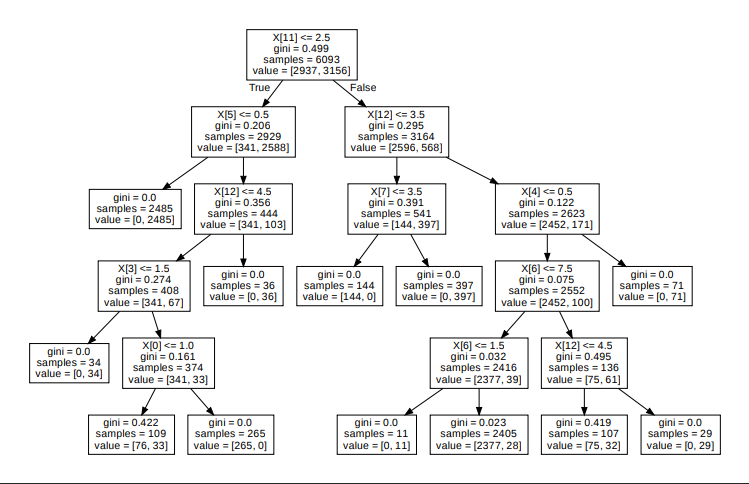

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scr = cross_val_score(model,X,y,cv=10)
cv_scr

array([0.68511685, 1.        , 1.        , 1.        , 0.97783251,
       1.        , 1.        , 0.99876847, 0.68596059, 0.91995074])

In [ ]:
cv_scr.mean()

0.9267629166439448